# Customer Churn Prediction
                                            - Kenny.D

### An end to end Machine Learning Program for a classification problem.

1. Data Cleaning
2. EDA
3. Model Building

#### Data Cleaning
1. Handle Null Values
2. Remove Duplicates
3. Clean SeniorCitizen Column from trash values
4. Drop CustomerID column

#### Exploratory Data Analysis
1. Plot countplots for categorical variables vs Churn
2. Plot barplots for numerical variables vs Churn
3. Plot heatmap of correlation

#### Model Building
1. Pre-processing  
    a. Train Test Split  
    b. One hot encoding for Categorical Variables  
    c. Scaling of Numerical Variables 
      
2. Machine Learning  
    a. Logistic Regression  
    b. Decision Tree  
    c. K Nearest Neighbor  
    d. Random Forest Classifier  
      
3. Testing  
    a. Accuracy Score  
    b. Confusion Matrix  
    c. Classification Report  
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("churn.csv")

Checking the data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


Firstly, it is important to understand the kind of data we are dealing with.  
Without a firm understanding of the data, we may not be able to explain our process to the client.

In [4]:
df.head().T

,0,1,2,3,4
customerID,2907-ILJBN,3896-RCYYE,9764-REAFF,6651-RLGGM,5879-SESNB
gender,Female,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,No
Dependents,Yes,No,No,Yes,No
tenure,11,67,59,67,11
CallService,Yes,No,Yes,Yes,Yes
MultipleConnections,No,No phone service,No,Yes,Yes
InternetConnection,No,DSL,No,No,Fiber optic
OnlineSecurity,No internet service,No,No internet service,No internet service,No


From the above, we learn that we are predicting if a Customer is likely to remain or churn.  
The data can be segregated into three types
1. Characteristics of the customer - gender, seniority, partner, dependents  
2. Characteristics of the service - Internet connection type, other services  
3. Characteristics of the payment - Agreement, Payment method, Total Amount  
  
Now that we know this, we can proceed forward as we have a grasp of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

From above output, we see that none of the variables have any null values.  
However, to confirm, we can check using the isnull function.

In [6]:
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

As we confirm that none of the columns have null values, we will next look at the categories in each variable.

In [7]:
df.nunique()

customerID                 5590
gender                        2
SeniorCitizen               755
Partner                       2
Dependents                    2
tenure                     3569
CallService                   2
MultipleConnections           3
InternetConnection            3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtectionService       3
TechnicalHelp                 3
OnlineTV                      3
OnlineMovies                  3
Agreement                     3
BillingMethod                 2
PaymentMethod                 4
MonthlyServiceCharges      5231
TotalAmount                8951
Churn                         2
dtype: int64

From the above output, we see two anamolies.  
1. Senior Citizen column should ideally have just two unique values. But this shows 755. We should look into that column further.  
2. Although we have 12335 customers, we only have 5590 Customer ID.   
   This could imply there may by duplicate rows.  
   Or, few customers has multiple telecom subscriptions.

Let's first check if the dataset has duplicate values.

In [8]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
97,3452-ABWRL,Male,1.0,No,No,47.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.60,No
190,8645-KOMJQ,Male,0.0,Yes,Yes,69.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),81.95,5601.40,No
195,9334-GWGOW,Male,1.0,Yes,No,7.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,485.25,No
216,7878-JGDKK,Male,0.0,No,No,4.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.55,220.75,No
278,7029-IJEJK,Female,0.0,No,No,54.0,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,4128-ETESU,Female,1.0,Yes,No,47.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.70,4747.20,No
6723,3606-SBKRY,Male,0.0,No,No,31.0,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.40,No
6725,2101-RANCD,Female,0.0,No,No,55.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.10,4144.90,No
6726,0303-WMMRN,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


In [9]:
df.duplicated().value_counts()

False    9328
True     3007
dtype: int64

We see that there are 3007 duplicate observations in this dataset. Let's remove them.

In [10]:
df2 = df.drop_duplicates()
df2.shape

(9328, 21)

In [11]:
df2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
12330,6894-LFHLY,Male,0.357423,No,Yes,2.927730,Yes,No,Fiber optic,No,...,No,No,No internet service,No internet service,Month-to-month,Yes,Mailed check,40.151251,76.135546,Yes
12331,0639-TSIQW,Female,0.000000,No,No,63.430477,No,No phone service,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),96.252187,6310.292602,Yes
12332,0639-TSIQW,Male,0.000000,No,Yes,49.677352,No,No phone service,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),70.445975,4091.168541,Yes
12333,0607-DAAHE,Male,0.660002,Yes,Yes,20.659911,Yes,No,No,No internet service,...,No,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,55.819099,560.153643,Yes
12334,1038-ZAGBI,Female,0.433856,Yes,No,8.529156,Yes,No,Fiber optic,No internet service,...,No internet service,No internet service,No,No internet service,One year,Yes,Mailed check,43.488511,263.006875,Yes


We see that Senior Citizen has 755 values. This cannot be true.  
Upon closer observation, we see some of the values are in between 0 and 1.  
This is some faulty data that needs to be removed.  
Hence, we will remove the rows where the column value is not 0 or 1.

In [12]:
df3 = df2.loc[df2["SeniorCitizen"].isin([0,1])]

In [13]:
df3.nunique()

customerID                 5590
gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                     2867
CallService                   2
MultipleConnections           3
InternetConnection            3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtectionService       3
TechnicalHelp                 3
OnlineTV                      3
OnlineMovies                  3
Agreement                     3
BillingMethod                 2
PaymentMethod                 4
MonthlyServiceCharges      4478
TotalAmount                8198
Churn                         2
dtype: int64

We have now taken care of the Senior Citizen problem.  
Next, we look into the CustomerID column.  
One explanation could be a customer has multiple telecom accounts.  
This is very much plausible as many people now have multiple mobile devices and sim cards.  
Hence, we can ignore that column.

In [14]:
df3 = df3.drop("customerID", axis = 1)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8575 entries, 0 to 12332
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   8575 non-null   object 
 1   SeniorCitizen            8575 non-null   float64
 2   Partner                  8575 non-null   object 
 3   Dependents               8575 non-null   object 
 4   tenure                   8575 non-null   float64
 5   CallService              8575 non-null   object 
 6   MultipleConnections      8575 non-null   object 
 7   InternetConnection       8575 non-null   object 
 8   OnlineSecurity           8575 non-null   object 
 9   OnlineBackup             8575 non-null   object 
 10  DeviceProtectionService  8575 non-null   object 
 11  TechnicalHelp            8575 non-null   object 
 12  OnlineTV                 8575 non-null   object 
 13  OnlineMovies             8575 non-null   object 
 14  Agreement              

We see that SeniorCitizen is in float format when it should be in object type format. Let's change that.

In [16]:
df3.SeniorCitizen = df3.SeniorCitizen.astype(str)
df3.SeniorCitizen = df3.SeniorCitizen.replace({'1.0':"Yes",'0.0':"No"})
df3.SeniorCitizen.value_counts()

No     7420
Yes    1155
Name: SeniorCitizen, dtype: int64

## Exploratory Data Analysis

Let's initially look at the distribution of Churn variable.

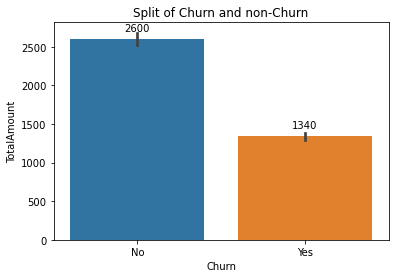

In [17]:
ax = sns.barplot(x=df3.Churn, y=df3.TotalAmount, data=df3)
ax.set(title='Split of Churn and non-Churn')

for p in ax.patches:

 height = p.get_height()

 ax.text(
     x = p.get_x()+(p.get_width()/2),      
     y = height+100,     
     s = '{:.0f}'.format(height),     
     ha = 'center')

We will next make plots for each of the variable with the target variable Churn.  

Text(0.5, 1.0, 'Count distribution of Churn with Gender')

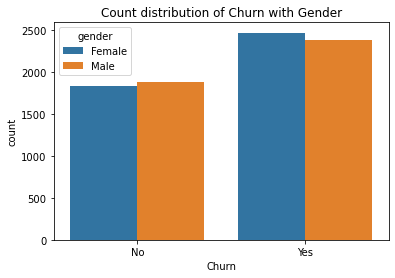

In [18]:
sns.countplot(data = df3, x=df3.Churn, hue = df3.gender)
plt.title("Count distribution of Churn with Gender")

<AxesSubplot:xlabel='Churn', ylabel='count'>

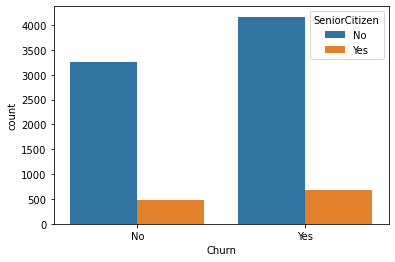

In [19]:
sns.countplot(data = df3, x = df3.Churn, hue = df3.SeniorCitizen)

Repeating the same code for each plot is tedious.  
Let's automate the process using a for loop for constructing countplots for all object type variables.

In [20]:
objectlst = list(df3.select_dtypes(["object"]).columns)
objectlst

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'CallService',
 'MultipleConnections',
 'InternetConnection',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtectionService',
 'TechnicalHelp',
 'OnlineTV',
 'OnlineMovies',
 'Agreement',
 'BillingMethod',
 'PaymentMethod',
 'Churn']

In [21]:
objectlst.remove("Churn")
objectlst.remove("PaymentMethod")

### BarPlot for non-continuous attributes

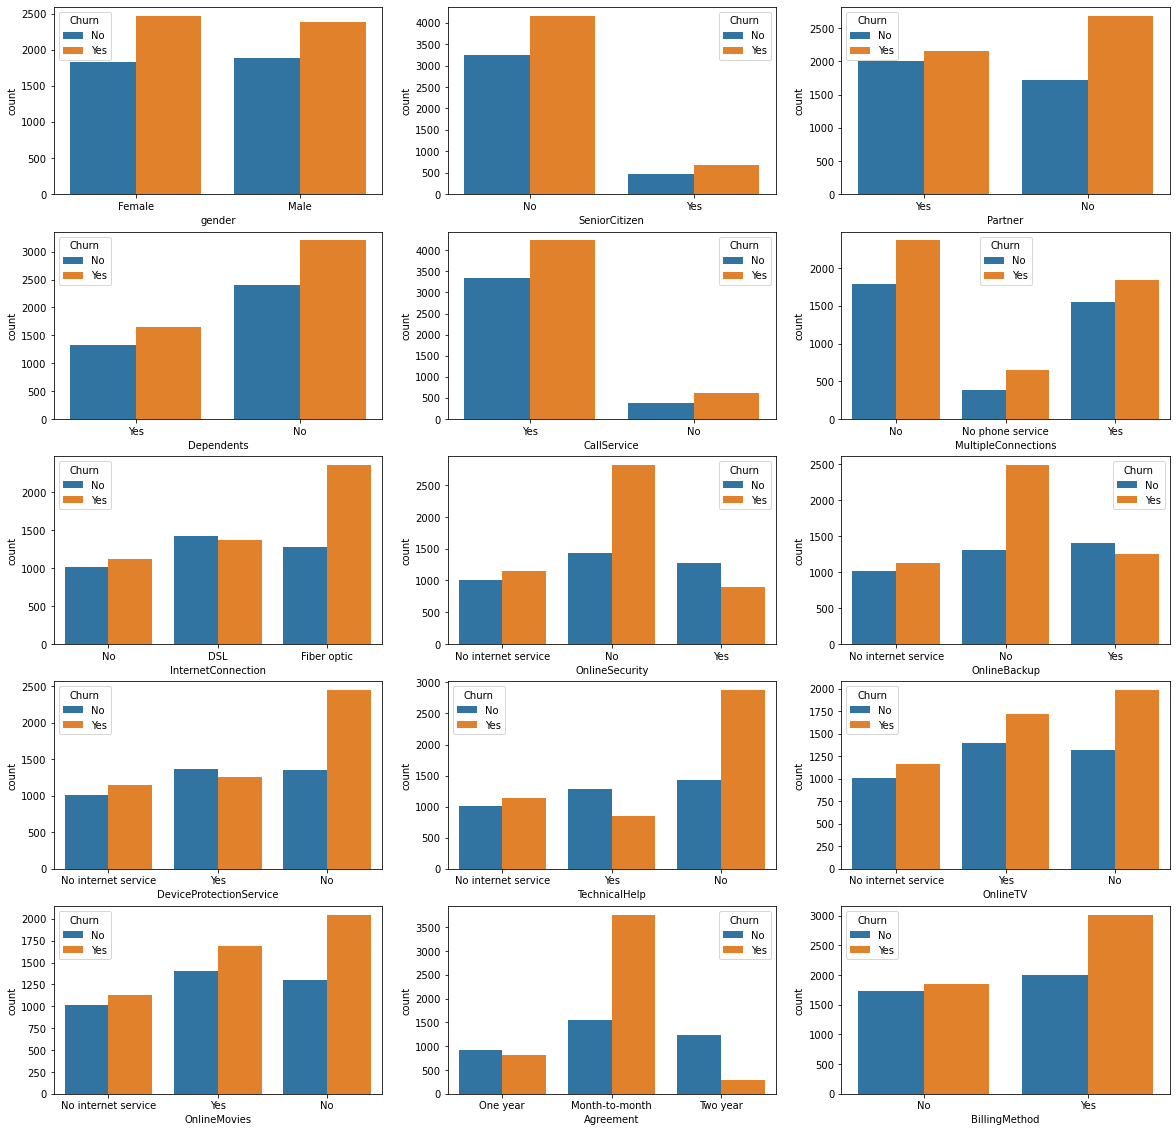

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
x=0
y=0
for col in objectlst:
    sns.countplot(data = df3, x = df3[col], hue = df3.Churn, ax=axes[x,y])
    
    y+=1
    if y>2:
        x+=1
        y=0
    if x>5:
        break

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

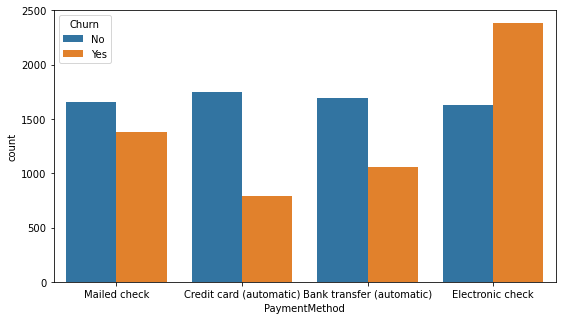

In [24]:
plt.figure(figsize=(9,5))
sns.countplot(data = df3, x = df.PaymentMethod, hue = df.Churn)

Lets see the insights we can draw from these graphs
1. Gender - No significant difference
2. Senior Citizen - No significant difference
3. Partner - There are more Customers who do not have a partner that have Churned
4. Dependents - No significant difference
5. Call Service - No significant difference
6. Multiple Connection - Customers without Multiple Connections have Churned more
7. Internet Connection - Customers with Fiber Optic connection have Churned tremendously
8. Online Security - Large number of Customers with No Online Security have Churned
9. Online Backup - Customer with No Online Backup service have Churned more
10. Device Protection Service - Customers with No Device Protection have Churned more
11. Technical Help - Customers who do not have Technical Help facilty have Churned more
12. Online TV - No Online TV have caused some relative churn
13. Online Movies - No Online Movies have caused some churn
14. Agreement - Month-to-month agreement has caused a large amount of churn
15. Billing Method - Electronic Check type of Billing method seems to cause high amount of Churn.

In [25]:
floatlst = list(df3.select_dtypes(["float64"]).columns)
len(floatlst)

3

### BarPlot for continuous attributes

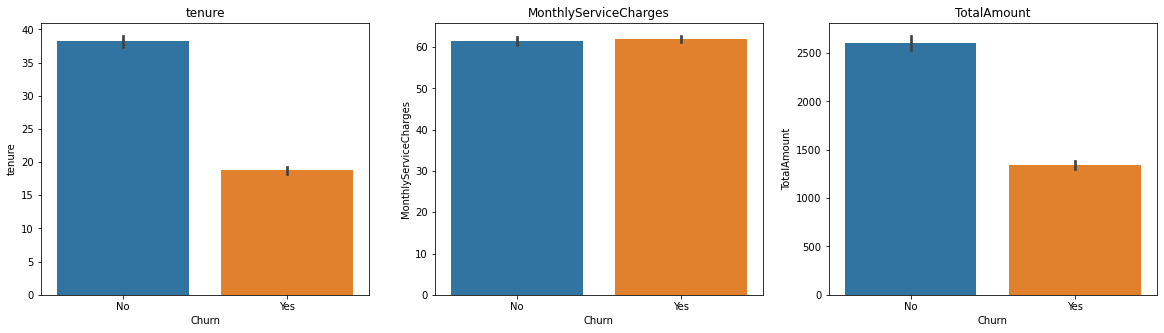

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
k=0
for col in floatlst:
    sns.barplot(data = df3, x = df3.Churn, y = df3[col], ax=axes[k])
    axes[k].set_title(col)
    k+=1
    

<AxesSubplot:>

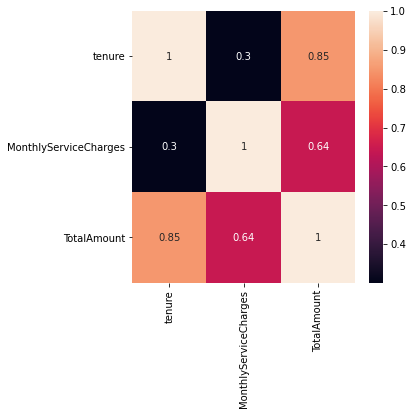

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df3.corr(), annot = True)

## Machine Learning Modelling

Let's split the dataset into input variables and target variable.

In [28]:
X = df3.drop("Churn", axis=1)
y = df3.Churn

Next, we need to split the dataset into train and test.  
This is done so that there is no data leakage for the machine from the test data.

In [29]:
from sklearn.model_selection import train_test_split
tts = train_test_split

In [30]:
X_train, X_test, y_train, y_test = tts(X,y)

To confirm that the split happened correctly, we will check the shape of each split.

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6431, 19) (2144, 19) (6431,) (2144,)


Now, we need to perform standardize the continuous variables.  
Hence, we split the dataset again to float and object types.

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
X_train_std = sc.fit_transform(X_train[floatlst])
X_test_std = sc.transform(X_test[floatlst])
print(X_train_std.shape, X_test_std.shape)

(6431, 3) (2144, 3)


In [34]:
X_train_df = pd.DataFrame(X_train_std, columns = floatlst)
X_test_df = pd.DataFrame(X_test_std, columns = floatlst)
print(X_train_df.shape, X_test_df.shape, df3.shape)

(6431, 3) (2144, 3) (8575, 20)


Next, we perform one Hot Encoding for Categorical Variables

In [35]:
X_train_obj = X_train.drop(columns = floatlst)
X_test_obj = X_test.drop(columns = floatlst)
print(X_train_obj.shape, X_test_obj.shape)

(6431, 16) (2144, 16)


In [36]:
X_train_dm = pd.get_dummies(X_train_obj, drop_first = True).reset_index()
X_test_dm = pd.get_dummies(X_test_obj, drop_first = True).reset_index()
print(X_train_dm.shape, X_test_dm.shape)

(6431, 28) (2144, 28)


In [37]:
X_train = pd.concat([X_train_dm, X_train_df], axis = 1)
X_test = pd.concat([X_test_dm, X_test_df],axis = 1)
print(X_train.shape, X_test.shape)

(6431, 31) (2144, 31)


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 5000)
log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)

### Checking the Accuracy

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [40]:
accuracy_score(log_preds, y_test)

0.9990671641791045

In [41]:
confusion_matrix(log_preds, y_test)

array([[ 892,    0],
       [   2, 1250]], dtype=int64)

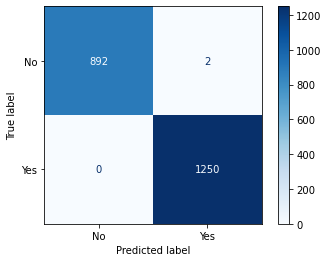

In [53]:
plot_confusion_matrix(log_model, X_test, y_test, cmap='Blues')

In [42]:
print(classification_report(log_preds, y_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       892
         Yes       1.00      1.00      1.00      1252

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



Let's write a simple function to fit, predict and return accuracy metrics. 

In [54]:
def algo(model):
    model.fit(X_train, y_train)
    model_preds = model.predict(X_test)
    print("Accuracy Score", accuracy_score(model_preds, y_test), "\n")
    print("Confusion Matrix")
    print(confusion_matrix(model_preds, y_test), "\n")
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
    print("Classification Report")
    print(classification_report(model_preds, y_test))

### Decision Tree

Accuracy Score 1.0 

Confusion Matrix
[[ 894    0]
 [   0 1250]] 

Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       894
         Yes       1.00      1.00      1.00      1250

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



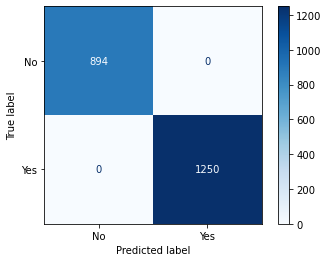

In [55]:
from sklearn.tree import DecisionTreeClassifier
algo(DecisionTreeClassifier(criterion = "entropy"))

See how efficiently we collated few lines of repeated code to simply one line.

### Random Forest Classifier

Accuracy Score 1.0 

Confusion Matrix
[[ 894    0]
 [   0 1250]] 

Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       894
         Yes       1.00      1.00      1.00      1250

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



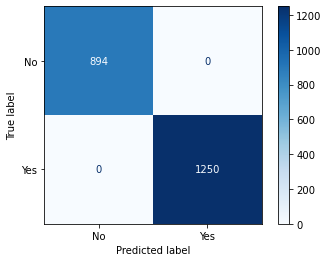

In [56]:
from sklearn.ensemble import RandomForestClassifier
algo(RandomForestClassifier())

### K Nearest Neighbor

Accuracy Score 1.0 

Confusion Matrix
[[ 894    0]
 [   0 1250]] 

Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       894
         Yes       1.00      1.00      1.00      1250

    accuracy                           1.00      2144
   macro avg       1.00      1.00      1.00      2144
weighted avg       1.00      1.00      1.00      2144



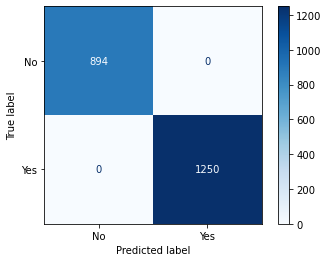

In [57]:
from sklearn.neighbors import KNeighborsClassifier
algo(KNeighborsClassifier())

With this, we have completed the end-to-end execution of Customer Churn Prediction.  
Hope you were able to get some takeaways from this exercise.